You are hired by an international bank with millions of customers spread all around Europe mainly in, three countries, Spain, France and Germany. In the last six months the bank detected that the number of people leaving the bank started to increase, so they decided to take measures. 

The bank decided to take a small sample of 10,000 of their customers and retrieve some information.
For six months they followed the behaviour of these 10,000 customers and analysed which stayed and who left the bank. 

Therefore, they want you to develop a model that can measure the probability of a customer leaving the bank.

### Start by importing numpy and pandas

In [3]:
import numpy as np
import pandas as pd

## Part 1 - Data Preprocessing

**Import the dataset Bank_customers.csv**

**Perform all required data preprocessing steps, until you have your train set and yout test set.**

In [4]:
df = pd.read_csv("Bank_customers.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
#affichage des fréquences des colonnes
for column in df.columns:
    if len(df[column].value_counts())<13:
        print(df[column].value_counts())
        print('\n---------------Fin ', column, ' -----------------------\n')

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

---------------Fin  Geography  -----------------------

Male      5457
Female    4543
Name: Gender, dtype: int64

---------------Fin  Gender  -----------------------

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

---------------Fin  Tenure  -----------------------

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

---------------Fin  NumOfProducts  -----------------------

1    7055
0    2945
Name: HasCrCard, dtype: int64

---------------Fin  HasCrCard  -----------------------

1    5151
0    4849
Name: IsActiveMember, dtype: int64

---------------Fin  IsActiveMember  -----------------------

0    7963
1    2037
Name: Exited, dtype: int64

---------------Fin  Exited  -----------------------



In [7]:
#Suppression des variables inutiles 
useless = ["RowNumber","CustomerId", "Surname"]
df.drop(columns = useless, inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
#Conversion des variables catégorielles en variables quantitatives 
df["Geography"] = df["Geography"].map({"France":1, "Spain":2, "Germany":3})
df["Gender"] = df["Gender"].map({"Female":1, "Male":2})
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,1,1,42,8,159660.80,3,1,0,113931.57,1
3,699,1,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,2,39,5,0.00,2,1,0,96270.64,0
9996,516,1,2,35,10,57369.61,1,1,1,101699.77,0
9997,709,1,1,36,7,0.00,1,0,1,42085.58,1
9998,772,3,2,42,3,75075.31,2,1,0,92888.52,1


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df.drop(columns=["Exited"]),df["Exited"] , test_size=0.3)

### Perform feature scaling

Use the StandardScaler class from sklearn.preprocessing. You can read more about it here https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

Use the fit_transform and the transform methods to perform feature scaling on your training set and your test set


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Part 2 - Now let's create the ANN!

### Importing the Keras libraries and packages
You are going to use the Sequential model. You can read more about it here https://keras.io/models/sequential/

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense

import **Dropout** to be used when adding layers: A Simple Way to Prevent Neural Networks from Overfitting

Dropout consists in randomly setting a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting.

Arguments:

rate: float between 0 and 1. Fraction of the input units to drop.

In [12]:
from keras.layers import Dropout

### Start by declaring a sequential model named classifier

In [13]:
classifier = keras.Sequential()

### Add the input layer and the first hidden layer using the .add() method

Use the **Dense** method that takes the following arguments: 

**units**: dimensionality of the output space.

**activation**: Activation function to use (relu for hidden layers, and sigmoid for output layer). 

**kernel_initializer**: Initializer for the kernel weights matrix.

In addition, add the argument **input_dim**: dimension of the input layer, to be passed for the first hidden layer.

In [14]:
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))

**Apply Dropout to the input units for regularization with a probability of 0.1**

In [15]:
classifier.add(Dropout(0.1, input_shape=(6,)))

### Add the second hidden layer made of 6 units

In [16]:
classifier.add(Dense(units = 6))

### Add the output layer 

In [17]:
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [18]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 66        
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


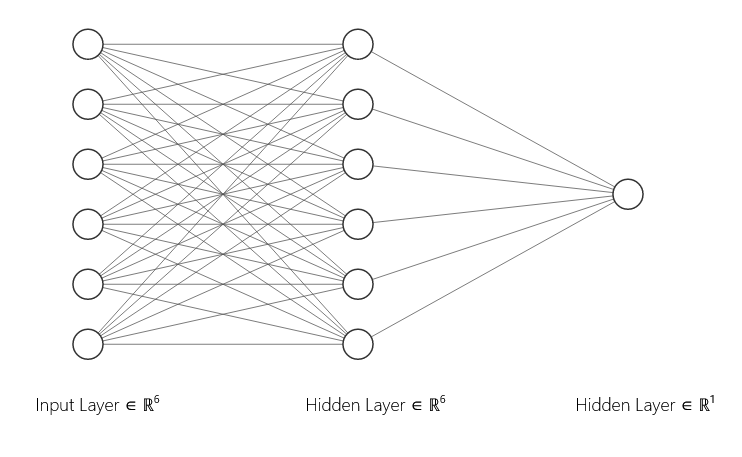

In [19]:
from IPython.display import Image
Image("reseau.PNG")

### Compiling the ANN

Before training a model, you need to configure the learning process, which is done via the **compile** method. 

It receives three arguments: an **optimizer** (use 'adam'), a **loss** function (use 'binary_crossentropy'), and list of **metrics** (use the 'accuracy'). 

In [20]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Fitting the ANN to the Training set

Keras models are trained on Numpy arrays of input data and labels. For training a model, you will typically use the **fit** function.

Arguments: 

Input data, Target data,

**batch_size**: Number of samples per gradient update 

**epochs**: Number of iterations on the dataset

You are going to train your model using a batch size of 10, and 100 epochs 

In [21]:
classifier.fit(X_train, Y_train, batch_size = 10, epochs = 100)

Epoch 1/100
700/700 [==============================] - 3s 2ms/step - loss: 0.4659 - accuracy: 0.8014
Epoch 2/100
700/700 [==============================] - 1s 2ms/step - loss: 0.4104 - accuracy: 0.8224
Epoch 3/100
700/700 [==============================] - 2s 2ms/step - loss: 0.3955 - accuracy: 0.8317
Epoch 4/100
700/700 [==============================] - 2s 2ms/step - loss: 0.3849 - accuracy: 0.8366
Epoch 5/100
700/700 [==============================] - 2s 3ms/step - loss: 0.3836 - accuracy: 0.8369
Epoch 6/100
700/700 [==============================] - 2s 2ms/step - loss: 0.3800 - accuracy: 0.8404
Epoch 7/100
700/700 [==============================] - 2s 2ms/step - loss: 0.3764 - accuracy: 0.8391
Epoch 8/100
700/700 [==============================] - 2s 2ms/step - loss: 0.3724 - accuracy: 0.8454
Epoch 9/100
700/700 [==============================] - 1s 2ms/step - loss: 0.3692 - accuracy: 0.8446
Epoch 10/100
700/700 [==============================] - 1s 2ms/step - loss: 0.3743 - accura

## Part 3 - Making predictions and evaluating the model



### Predicting the Test set results

#### Use the .predict(input data) method. It generates output predictions for the input samples.

### Credit Score 	600
### Country 	France
### Gender 	Male
### Age 	40 years
### Tenure   3
### Balance remaining 	$50000
### Number of Products owned 	2
### Owns credit card     Yes
### Is an Active Member? 	Yes
### Estimated Salary 	$42000

In [22]:
print(classifier.predict(scaler.transform([[600,1, 1, 40, 3, 50000, 2, 1, 1, 42000]])))


1/1 [==============================] - 0s 112ms/step
[[0.10061663]]


#### Since the output value of a sigmoid function varies between 0 and 1. Choose a threshold (use 0.5) to assign a value of 1 for predictions higher than 0.5, and 0 otherwise.

In [23]:
pred = classifier.predict(scaler.transform([[600,1, 1, 40, 3, 50000, 2, 1, 1, 42000]])) > 0.5
if pred==False:
    pred = 0
else :
    pred = 1
    

print("pred =",pred)

1/1 [==============================] - 0s 27ms/step
pred = 0


### Visualisons ça pour l'ensemble du train set

In [24]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
pd.DataFrame(list(zip(Y_test, y_pred)), columns=['Actual', 'Predicted'])

94/94 [==============================] - 0s 1ms/step


,Actual,Predicted
0,0,[False]
1,0,[False]
2,0,[False]
3,0,[False]
4,0,[False]
...,...,...
2995,0,[False]
2996,0,[False]
2997,0,[False]
2998,0,[False]


### Il semble que le modèle est plutôt bon, mais on voit qu'il a fait une faute pour la troisième valeur. Regardons la matrice de confusion pour analyser ceci

### Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(Y_test, y_pred))
print(accuracy_score(Y_test, y_pred))

[[2320   83]
 [ 347  250]]
0.8566666666666667


### Le modèle a correctement prédit que 2305 clients avaient résilié, et que 247 clients n'avaient pas résilié . Sur le reste, il s'est trompé.

## Predicting a single new observation

Predict if the customer with the following informations will leave the bank:
Geography : France  -  Credit score : 600  -  Gender : Male  -  Age : 40  -  Tenure : 3  -  Balance : 60000  -  Number of products : 2  -  Has credit card: Yes  -  Is an active memeber: Yes  -  Estimated salary : 50000

What is the output value of your classifier? is the customer going to leave the bank?

In [26]:
pred = classifier.predict(scaler.transform([[600,1, 1, 40, 3, 60000, 2, 1, 1, 50000]]))
print(pred)
# Le client ne va pas résilier vu le score

1/1 [==============================] - 0s 24ms/step
[[0.1043528]]


##  4 - Evaluating the ANN

You can use Sequential Keras models as part of your Scikit-Learn workflow via the wrappers found in keras library. More info can be found here https://keras.io/scikit-learn-api/

KerasClassifier Arguments :
    
build_fn should construct, compile and return a Keras model, which will then be used to fit/predict. 

sk_params: model parameters & fitting parameters

In [27]:
from keras.wrappers.scikit_learn import KerasClassifier

In [28]:
from sklearn.model_selection import cross_val_score

#### create the function that builds the architecture of the ANN

In [29]:
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

#### Create an object inside this class named kclassifier that takes the previous function as arguments, and  the batch_size and the number of epochs

In [30]:
kclassifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 100,verbose=0)
print(kclassifier)


C:\Users\nabil\AppData\Local\Temp/ipykernel_4664/3848743694.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  kclassifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 100,verbose=0)


#### Use the cross_val_score function. Define an array that will contain the k-accuracies of the k-fold CV, name it accuracies.


In [31]:
# from sklearn.metrics import make_scorer, accuracy_score

In [33]:
accuracies = cross_val_score(estimator = kclassifier, X = X_train, y = Y_train, cv = 10, scoring = "accuracy")

22/22 [==============================] - 0s 2ms/step


KeyboardInterrupt: 

#### Calculate the mean and the varince of your accuracies

In [ ]:
mean = accuracies.mean()

In [ ]:
variance = accuracies.std()

## Part 5 - Tuning the ANN (something for you to work on at home, if you want)

In [ ]:
#from sklearn.model_selection import GridSearchCV